# install packages
- pip install lime statsmodels

In [21]:
from __future__ import print_function
import sklearn
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.api as sm

In [4]:
phi_f = 0.58
phi_t = 0.58
t_end = 50000

dataset_1 = pd.read_csv("../data/phi%.2f/ML_input_train.txt" %phi_f, sep=";")
dataset1  = dataset_1
dataset_2 = pd.read_csv("../data/phi%.2f/ML_input_test.txt"  %phi_t, sep=";")
dataset2  = dataset_2[1:t_end:1]
dataset_3 = pd.read_csv("../data/phi%.2f/ML_input_train_average.txt"
                        %phi_f, sep=";")
dataset3  = dataset_3[1:t_end:1]

# strain to failure
X_train = dataset1.drop(columns=["s_to_failure"])
y_train = dataset1.s_to_failure.values
X_test = dataset2.drop(columns=["s_to_failure"])
y_test = dataset2.s_to_failure.values

NameError: name 'pd' is not defined

In [5]:
# stress strainカーブの可視化
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter (dataset1.s_to_failure, dataset1.stress, 
             c='red', s=10, label = 'Train data')
plt.scatter (dataset2.s_to_failure, dataset2.stress, 
             c='blue', s=10, label = 'Test data')
plt.xlabel('strain to failure')
plt.ylabel('stress (kPa)')
plt.legend(loc = 'upper left')
plt.grid()

plt.tight_layout()
#plt.savefig("raw_from_phi%.2f_to_phi%.2f.eps" % (phi_f, phi_t))
plt.savefig("stress-strain_raw.eps")
plt.show()

NameError: name 'dataset1' is not defined

<Figure size 640x640 with 0 Axes>

In [6]:
# stress strainカーブの可視化
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter (dataset3.s_to_failure, dataset3.average_stress, 
             c='red', s=10, label = 'Averaged train data')
plt.scatter (dataset2.s_to_failure, dataset2.average_stress, 
             c='blue', s=10, label = 'Test data')

plt.xlabel('strain to failure')
plt.ylabel('stress (kPa)')
plt.legend(loc = 'upper left')
plt.grid()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1)

plt.tight_layout()
#plt.savefig("ave_from_phi%.2f_to_phi%.2f.eps" % (phi_f, phi_t))
plt.savefig("stress-strain_average.eps")
plt.show()

NameError: name 'dataset3' is not defined

<Figure size 640x640 with 0 Axes>

In [7]:
import time
start = time.time()

from sklearn.ensemble import RandomForestRegressor

tree  = 1000 # The number of trees in the forest.
depth = 20  # The maximum depth of the tree. 

r_forest = RandomForestRegressor(n_estimators=tree, max_depth=depth, n_jobs=-1)

# Build a forest of trees from the training set (X, y).
r_forest.fit(X_train, y_train)

end = time.time()
print('{:.2f}'.format(end-start), 'sec')

NameError: name 'X_train' is not defined

In [8]:
# predict y value for test data
y_test_pred = r_forest.predict(X_test)
# predict y value for train data
y_train_pred = r_forest.predict(X_train)

NameError: name 'X_test' is not defined

In [9]:
### stress strainカーブの可視化
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter (dataset3.s_to_failure, dataset3.stress, 
             c='red', s=10, label = 'Averaged Train data')
plt.scatter (y_test, X_test.stress, 
             c='blue', s=10, label = 'Test data')
plt.scatter (y_test_pred, X_test.stress, 
             c='green', s=10, label = 'Predicted data')

plt.xlabel('strain to failure')
plt.ylabel('stress (kPa)')
plt.legend(loc = 'upper left')
plt.grid()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1)

plt.tight_layout()
#plt.savefig("ss_from_phi%.2f_to_phi%.2f.eps" % (phi_f, phi_t))
plt.savefig("stress-strain_prediction.eps")
plt.show()

NameError: name 'dataset3' is not defined

<Figure size 640x640 with 0 Axes>

In [10]:
### broken bond カーブの可視化
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter (dataset3.s_to_failure, dataset3.AE, 
             c='red', s=10, label = 'Averaged Train data')
plt.scatter (y_test, X_test.AE, 
             c='blue', s=10, label = 'Test data')
plt.scatter (y_test_pred, X_test.AE, 
             c='green', s=10, label = 'Predicted data')

plt.xlabel('strain to failure')
plt.ylabel('broken bond')
plt.legend(loc = 'upper left')
plt.grid()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1)

plt.tight_layout()
#plt.savefig("ss_from_phi%.2f_to_phi%.2f.eps" % (phi_f, phi_t))
plt.savefig("broken_bond_prediction.eps")
plt.show()

NameError: name 'dataset3' is not defined

<Figure size 640x640 with 0 Axes>

In [11]:
from sklearn import metrics
R2_ave = metrics.r2_score(y_test, dataset3.s_to_failure) #metrics.r2_score(y_true, y_pred)
R2_test = metrics.r2_score(y_test, y_test_pred) 

#R2_original = metrics.r2_score(y_test, y_train)
#print('R2 train : %f, test : %f, original : %f' % (R2_train, R2_test, R2_original) )
print('R2 average : %f, test : %f' % (R2_ave, R2_test) )

# R^2の計算
#from sklearn.metrics import r2_score
#print(' R2 train : %f, test : %f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

NameError: name 'y_test' is not defined

In [12]:
# MSEの計算
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test, y_test_pred)
print('MSE train : %f, test : %f' % (MSE_train, MSE_test) )

NameError: name 'y_train' is not defined

In [13]:
# 残差の可視化
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', s = 35, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'red', marker = 's', s = 35, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -0.2, xmax = 0.15, lw = 2, color = 'black')
plt.xlim([-0.2, 0.15])
plt.grid()

plt.tight_layout()
plt.savefig("residuals.eps")
plt.show()

NameError: name 'y_train_pred' is not defined

<Figure size 720x504 with 0 Axes>

In [14]:
# Feature importance
dataset = dataset2
dataset = dataset2.drop(columns=["s_to_failure"])
fti = r_forest.feature_importances_  
importance = []
print('Feature Importances:')
for i, feat in enumerate(dataset):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))
    importance.append(feat)

NameError: name 'dataset2' is not defined

Reading file elastic_tensor_2015.json.gz_tensor_2015_featurized.json: 0it [04:58, ?it/s]
Decoding objects from elastic_tensor_2015.json.gz_tensor_2015_featurized.json: 0it [04:58, ?it/s]


NameError: name 'fti' is not defined

<Figure size 432x288 with 0 Axes>

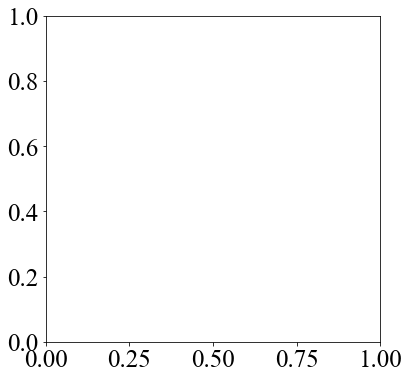

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25
plt.tight_layout()

plt.figure(figsize=(6, 6))
plt.ylim([0, 1])
y = fti
x = np.arange(len(y))
plt.bar(x, y, align="center")
plt.ylabel('Feature importance')
plt.xticks(x, importance)
plt.xticks(rotation=70)

plt.tight_layout()
plt.savefig("importance.eps")
plt.show()

# parameter study

1. n_estimators

2. depth

3. number of samplings

In [16]:
import time
start = time.time()

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

depth = 20
model1 = RandomForestRegressor(max_depth=depth, n_jobs=-1)
estimators = np.arange(50, 500, 100)
scores1 = []
for n in estimators:
    model1.set_params(n_estimators=n)
    model1.fit(X_train, y_train)
    scores1.append(model1.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.xticks(np.arange(0, 500, step=50))

plt.tight_layout()
plt.scatter(estimators, scores1)
plt.savefig("n_estimators.eps")
plt.show() 

end = time.time()
print('{:.2f}'.format(end-start), 'sec')

NameError: name 'X_train' is not defined

In [17]:
import time
start = time.time()

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

tree = 500
model2 = RandomForestRegressor(n_estimators=tree, n_jobs=-1)
depth = np.arange(10, 200, 10)
scores2 = []
for n in depth:
    model2.set_params(max_depth=n)
    model2.fit(X_train, y_train)
    scores2.append(model2.score(X_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.xticks(np.arange(0, 200, step=50))

plt.tight_layout()
plt.scatter(depth, scores2)
plt.savefig("max_depth.eps")
plt.show()

end = time.time()
print('{:.2f}'.format(end-start), 'sec')

NameError: name 'X_train' is not defined

In [18]:
import time
start = time.time()

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman' # Fonts
plt.rcParams["font.size"] = 25

t_end = len(dataset1)
tree  = 1000 # The number of trees in the forest.
depth = 20  # The maximum depth of the tree. 

model3 = RandomForestRegressor(n_estimators=tree, max_depth=depth, n_jobs=-1)
sampling = np.arange(0, 14, 1)
scores = []
R2 = []
for n in sampling:
    sampling_n = pow(2, n)
    dataset1 = dataset_1[0:t_end:sampling_n]
    dataset2 = dataset_2
    X_train_ = dataset1.drop(columns=["s_to_failure"])
    y_train_ = dataset1.s_to_failure.values
    X_test_  = dataset2.drop(columns=["s_to_failure"])
    y_test_  = dataset2.s_to_failure.values
    model3.fit(X_train_, y_train_)
    scores.append(model3.score(X_test_, y_test_))
    
plt.title("Effect of number of sampling")
plt.xlabel("number of data")
plt.ylabel("score")
plt.xscale('log')
plt.xlim(1.,1e5)
plt.ylim(0.,1.)

plt.tight_layout()
plt.scatter(t_end/pow(2,sampling), scores)
plt.savefig("n_data.eps")
plt.show()

end = time.time()
print('{:.2f}'.format(end-start), 'sec')

NameError: name 'dataset1' is not defined